# Demos

In [1]:
from mandel import Mandelbrot
import numpy as np
from mpire.dashboard import start_dashboard
from mpire.dashboard import connect_to_dashboard

In [2]:
dashboard_details = start_dashboard()
connect_to_dashboard(manager_port_nr=dashboard_details['manager_port_nr'], manager_host='localhost')

RuntimeError: You're already connected to a running dashboard

## Mandelbrot set

### examples

Object initialised, call plot() method to plot image or save() method to save in images directory...


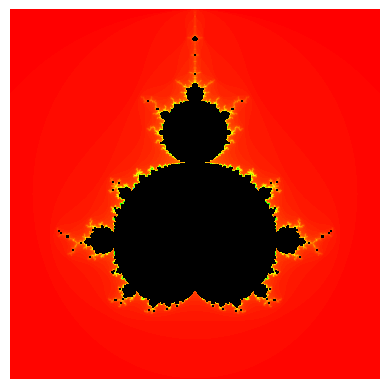

In [3]:
Mandelbrot().plot()

### mandel zoom

In [2]:
def get_target_coords(x_init, y_init, target):
    (m, x, y) = target
    x_l = abs(x_init[1] - x_init[0])/m
    x_ran_target = (x - x_l/2, x + x_l/2)

    y_l = abs(y_init[1] - y_init[0])/m
    y_ran_target = (y - y_l/2, y + y_l/2)

    return x_ran_target, y_ran_target


In [3]:
x_init = (-3, 3)
y_init = (-1.6875, 1.6875)

n_iters = 120

# x_target = (-0.750222, -0.749191)
# y_target = (0.031161, 0.031752)

# (m, x, y) = (2, -0.59990625, -0.4290703125)

(m, x, y) = (6e+4, -1.186592e+0, -1.901211e-1)
target = (62407000, -0.743643900055, -0.131825890901)


first, lets have a look at the target location for the zoom

In [6]:
(m, x, y) = (62407000, -0.743643900055, -0.131825890901)

x_l = abs(x_init[1] - x_init[0])/m
x_target = (x - x_l/2, x + x_l/2)

y_l = abs(y_init[1] - y_init[0])/m
y_target = (y - y_l/2, y + y_l/2)

manTarg = Mandelbrot(x_ran=x_target, y_ran=y_target, threshold=5000)

Object initialised, call plot() method to plot image or save() method to save in images directory...


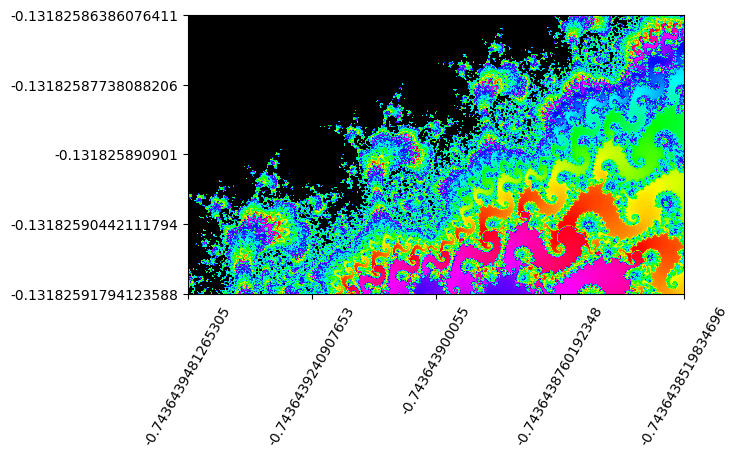

In [11]:
manTarg.plot(axis='on')

now we create an object from an initial frame and call the zoom method with the target

Object initialised, call plot() method to plot image or save() method to save in images directory...


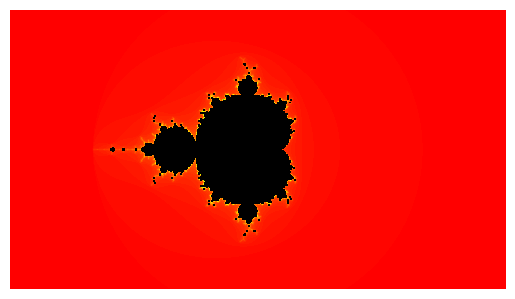

In [8]:
manzoom = Mandelbrot(x_ran=(-3, 3), y_ran=(-1.6875, 1.6875), n_pts=3456, threshold=5000)
manzoom.plot()

for i in range(n_iters):
    man = Mandelbrot(mode='mandelbrot', x_ran=x_ranges[i], y_ran=y_ranges[i], n_pts=1920)
    man.save(f'zoomgeom/image{i}')
    print(f'iteration {i} completed...')

Build GIF
with imageio.get_writer('images/mandel_zoom7.gif', mode='I') as writer:
    for filename in [f'images/zoomgeom/image{i}.png' for i in range(n_iters)]:
        image = imageio.imread(filename)
        writer.append_data(image)

In [10]:
# ideal n_frames is probably related best to the zoom factor m
target = (62407000, -0.743643900055, -0.131825890901)
manzoom.zoom(n_frames=500, target=target)

  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Julia Set

### examples

### Spin Animation

In [2]:
julS = Mandelbrot(julia=True)

Object initialised, call plot() method to plot image or save() method to save in images directory...


In [3]:
julS.spin(n_frames=600)

  0%|          | 0/600 [00:00<?, ?it/s]

Completed, video saved at 'videos/spin_(-0.79+0.15j)_600_frames.gif'


previously 6m32s - tdqm: 6m03s

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [ ]:
n_iters = 60
a_ran = np.linspace(0, 2*np.pi, n_iters)

for i in range(n_iters):
    a = a_ran[i]
    jul = Mandelbrot(mode='julia', c=0.7885*np.exp(1j*a), x_ran=(-1.5,1.5), y_ran=(-1.5,1.5), n_pts=1000)
    jul.plot(save=True, filename=f'spin/image{i}', c_map='prism', dpi=600)

In [22]:
# Build GIF
with imageio.get_writer('images/julia_spin2.gif', mode='I') as writer:
    for filename in [f'images/spin/image{i}.png' for i in range(n_iters)]:
        image = imageio.imread(filename)
        writer.append_data(image)

/var/folders/3p/sfv68y0d48x7855k_3bdlj8w0000gn/T/ipykernel_38579/4206869640.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


<img src="images/julia_spin2.gif" width="500">
<img src="images/julia_spin4.gif" width="500">

investigating threshold level